# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TASK: Run the cell below to read in the data.**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fellmir/pyMachineLearningMasterclass/main/input_data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [5]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# CODE HERE
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.shape

(303, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
def count_all_unique_values(df):
    value_counts_dict = {}
    for col in df.columns:
        value_counts_dict[col] = df[col].value_counts()
    return value_counts_dict

In [11]:
print(count_all_unique_values(df))

{'age': 58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64, 'sex': 1    207
0     96
Name: sex, dtype: int64, 'cp': 0    143
2     87
1     50
3     23
Name: cp, dtype: int64, 'trestbps': 120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1


In [12]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

Text(0, 0.5, 'Count')

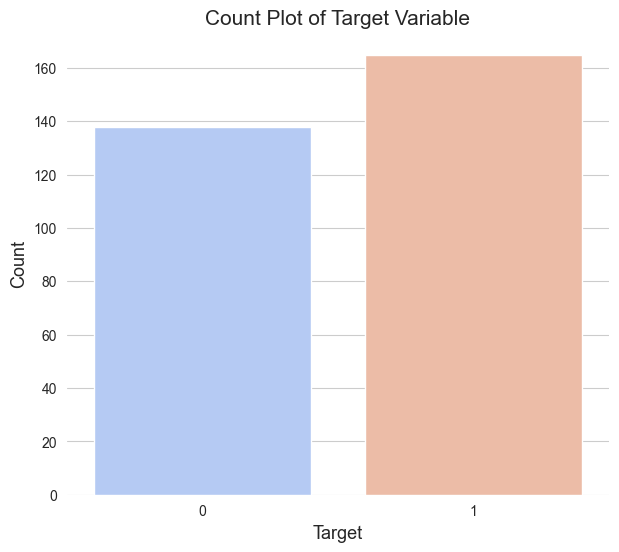

In [13]:
# CODE HERE!
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(7, 6))

sns.countplot(x="target", data=df, palette="coolwarm")

sns.despine(left=True, bottom=True)

ax.set_title('Count Plot of Target Variable', fontsize=15)

ax.set_xlabel('Target', fontsize=13)
ax.set_ylabel('Count', fontsize=13)

<AxesSubplot:xlabel='target', ylabel='count'>

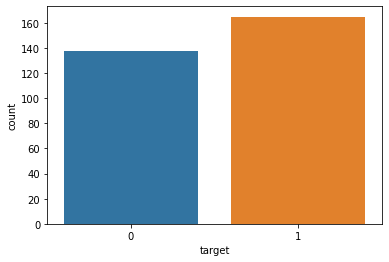

**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

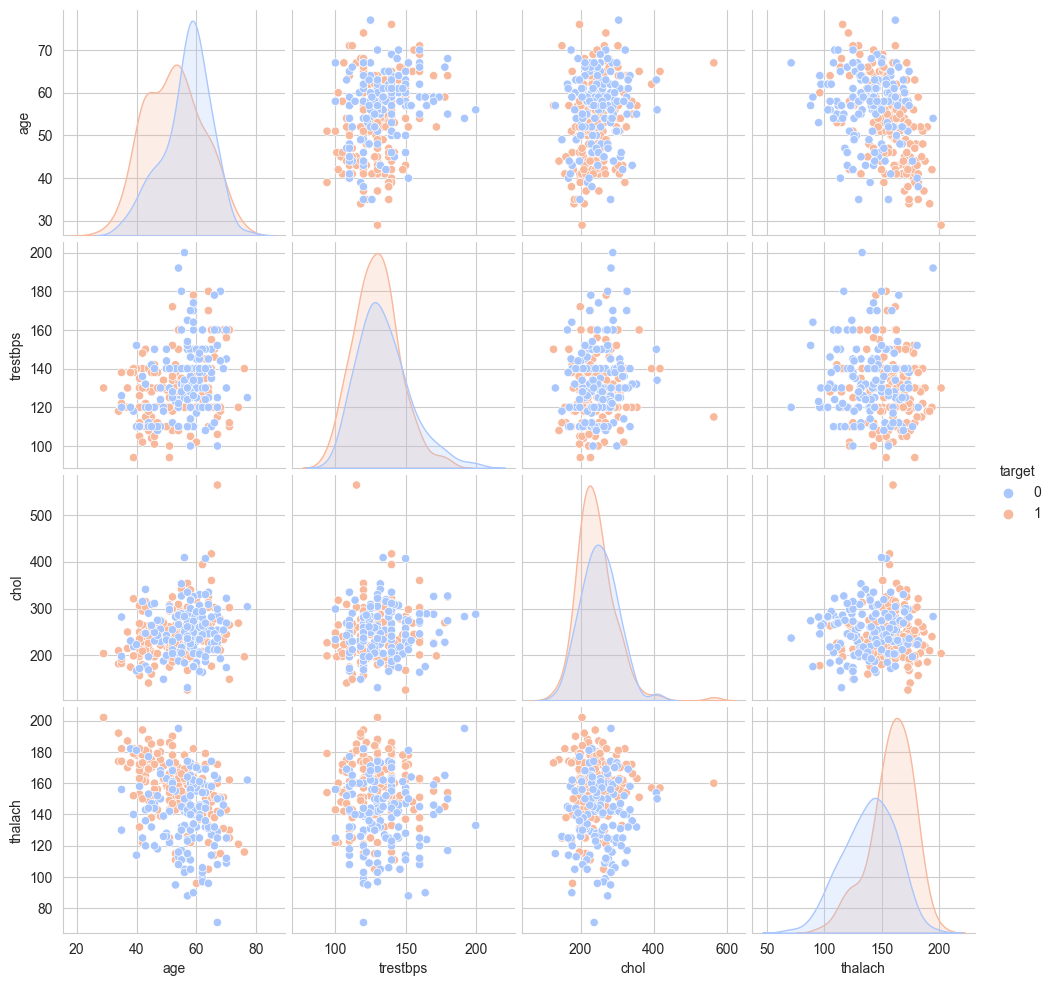

In [14]:
# CODE HERE
df_subset = df[['age', 'trestbps', 'chol', 'thalach', 'target']]

sns.pairplot(df_subset, hue='target', palette='coolwarm')

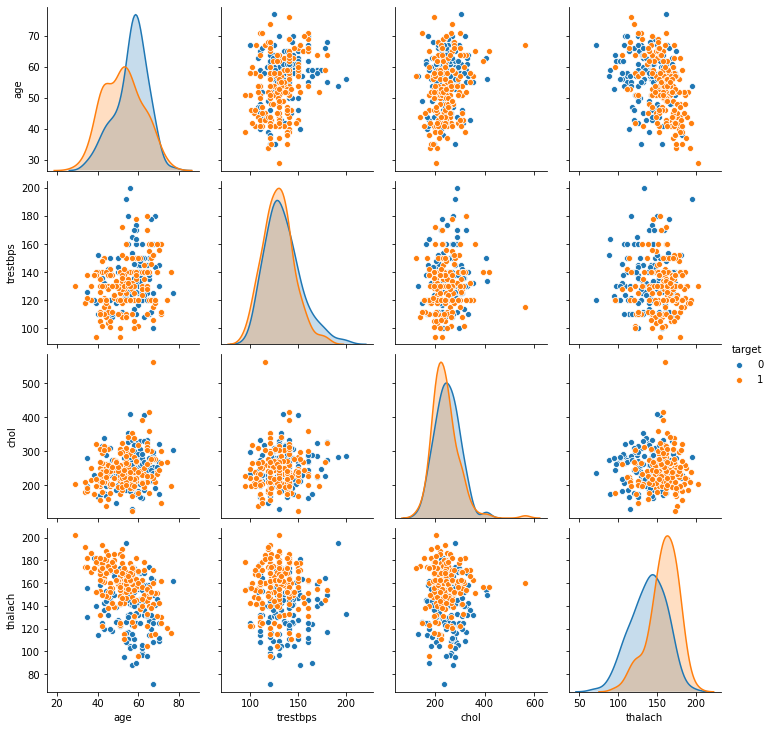

**TASK: Create a heatmap that displays the correlation between all the columns.**

<Axes: >

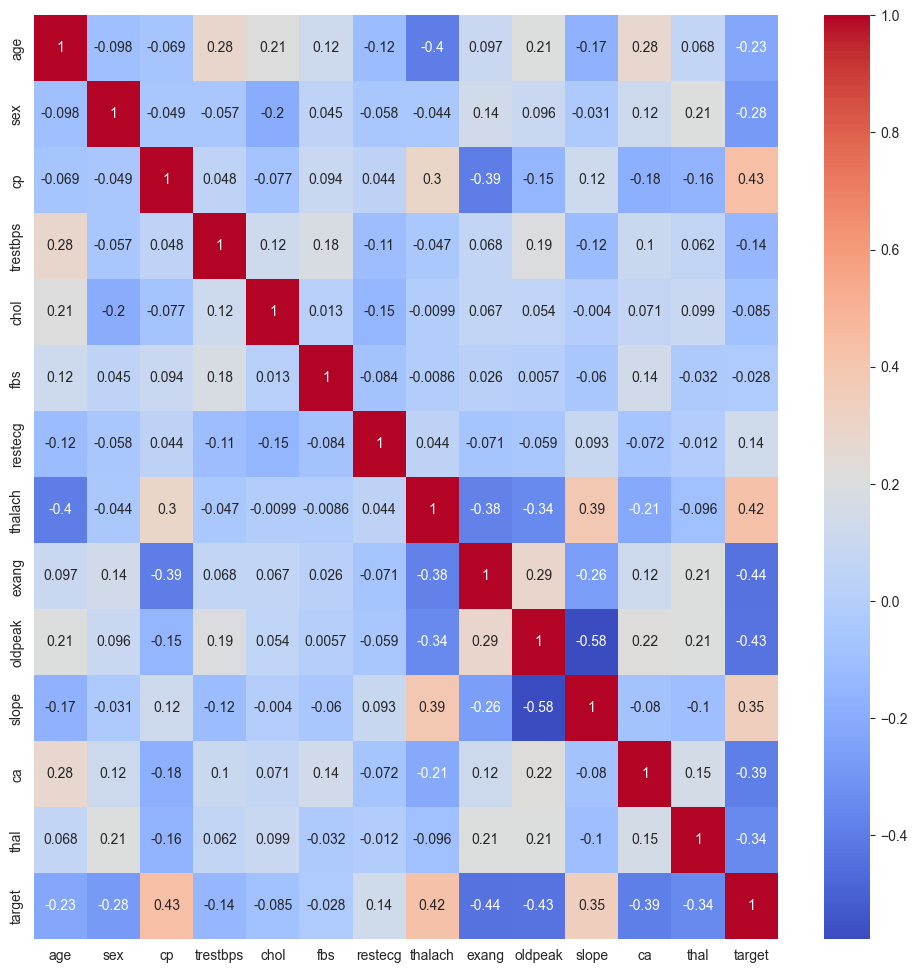

In [15]:
# CODE HERE
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

<AxesSubplot:>

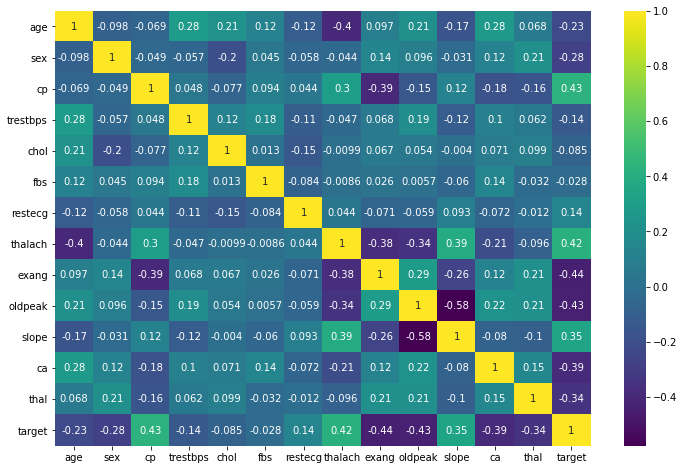

<Axes: xlabel='target', ylabel='cp'>

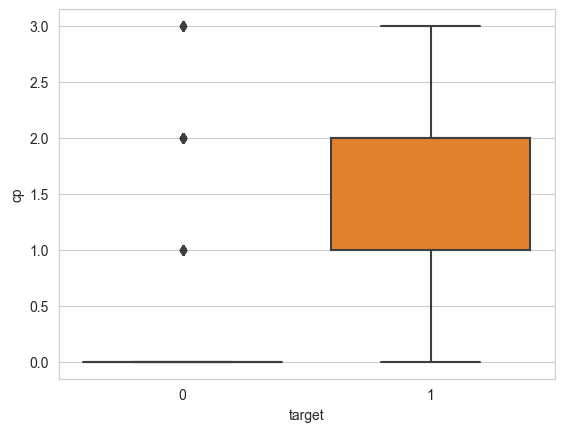

In [16]:
sns.boxplot(x='target',y='cp',data=df)

<Axes: xlabel='target', ylabel='exang'>

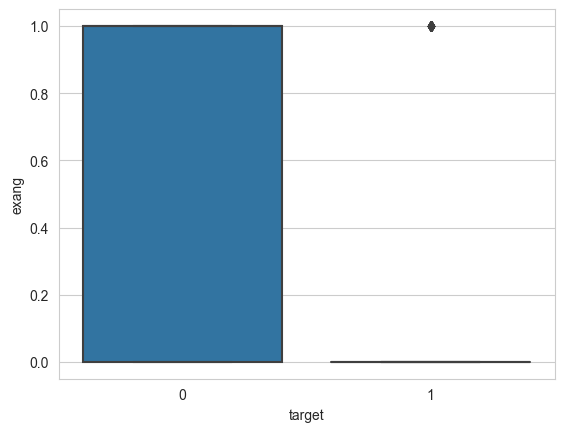

In [17]:
sns.boxplot(x='target',y='exang',data=df)

<Axes: xlabel='chol', ylabel='thalach'>

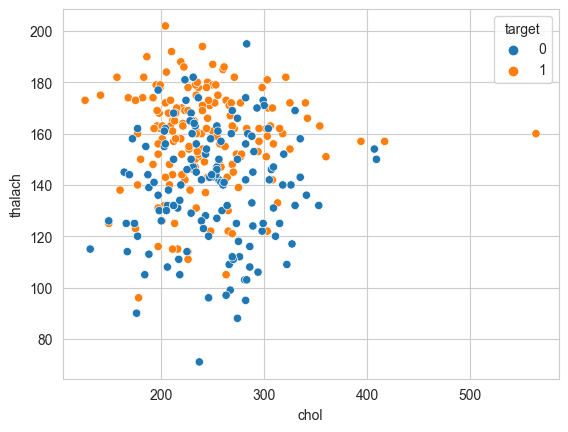

In [18]:
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')

<Axes: xlabel='trestbps', ylabel='chol'>

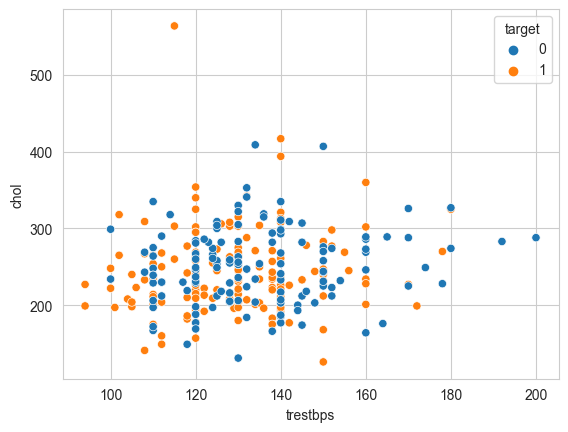

In [19]:
sns.scatterplot(x='trestbps',y='chol',data=df,hue='target')

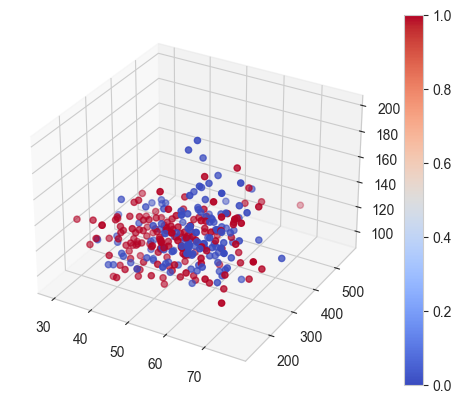

In [20]:
from mpl_toolkits.mplot3d import Axes3D 

cmap = plt.get_cmap("coolwarm")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['age'], df['chol'], df['trestbps'], c=df['target'], cmap=cmap)

plt.colorbar(sc)

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [21]:
# CODE HERE
X = df.drop('target', axis=1)

y = df['target']

In [22]:
X.shape

(303, 13)

In [23]:
y.shape

(303,)

In [24]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [26]:
# CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [27]:
# CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

In [28]:
scaled_X_test = scaler.transform(X_test)

In [29]:
scaled_X_train

array([[ 1.04970247,  0.69737995,  1.97993226, ..., -0.67167968,
        -0.71422572, -0.4842146 ],
       [ 0.61644136,  0.69737995, -0.94692412, ...,  0.9451068 ,
         1.23823052,  1.14178999],
       [-0.68334197,  0.69737995,  0.02869467, ..., -2.28846615,
        -0.71422572,  1.14178999],
       ...,
       [-0.89997253,  0.69737995,  0.02869467, ...,  0.9451068 ,
        -0.71422572,  1.14178999],
       [-1.44154891,  0.69737995,  0.02869467, ..., -0.67167968,
        -0.71422572, -2.11021919],
       [-0.68334197, -1.43393855,  1.00431346, ...,  0.9451068 ,
        -0.71422572, -0.4842146 ]])

In [30]:
scaled_X_test

array([[ 0.07486497,  0.69737995, -0.94692412,  0.47001573, -0.55502259,
        -0.42732739,  0.89828426, -1.70935702,  1.47064295,  4.11840557,
        -2.28846615, -0.71422572,  1.14178999],
       [-0.25008086,  0.69737995,  1.00431346,  2.28905391, -0.89683273,
         2.34012617,  0.89828426,  0.52722104, -0.6799747 , -0.43237682,
         0.9451068 , -0.71422572,  1.14178999],
       [ 0.3998108 , -1.43393855, -0.94692412, -1.803782  ,  0.03365043,
        -0.42732739, -0.99577247, -1.22695783, -0.6799747 ,  0.01377832,
        -0.67167968, -0.71422572, -0.4842146 ],
       [-1.65817947, -1.43393855,  1.00431346,  0.35632584, -0.49805423,
        -0.42732739,  0.89828426,  0.08867632, -0.6799747 , -0.87853195,
        -0.67167968, -0.71422572, -0.4842146 ],
       [ 0.61644136,  0.69737995, -0.94692412, -0.38265842,  0.22354495,
        -0.42732739, -0.99577247, -0.39372287,  1.47064295,  1.61993681,
        -0.67167968,  0.2620024 ,  1.14178999],
       [-0.57502669,  0.697379

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [31]:
# CODE HERE
from sklearn.linear_model import LogisticRegression

In [39]:
log_model = LogisticRegression(solver='saga', max_iter=5000)

In [26]:
# help(LogisticRegressionCV)

In [40]:
from sklearn.model_selection import GridSearchCV

# set up penalty choice/type
penalty = ['l1', 'l2']

# and regularization C-value
C = np.logspace(-10, 10, 50) # logarithmically spaced

# create a grid_model
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [41]:
# fit it
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.90604321e-06, 2.02358965e-05, 5.17947468e-05, 1.32571137e-04,
       3.39322177e-04, 8...
       2.68269580e+01, 6.86648845e+01, 1.75751062e+02, 4.49843267e+02,
       1.15139540e+03, 2.94705170e+03, 7.54312006e+03, 1.93069773e+04,
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']})

LogisticRegressionCV()

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [42]:
# CODE HERE
grid_model.best_params_

{'C': 0.014563484775012445, 'penalty': 'l2'}

### Coeffecients

**TASK: Report back the model's coefficients.**

In [43]:
best_log_model = LogisticRegression(solver='saga', max_iter=5000, C=0.014563484775012445, penalty='l2')

best_log_model.fit(scaled_X_train, y_train)

LogisticRegression(C=0.014563484775012445, max_iter=5000, solver='saga')

In [44]:
best_log_model.coef_

array([[-0.08850501, -0.22924712,  0.33554322, -0.08443391, -0.05039575,
         0.00868929,  0.05714694,  0.21708561, -0.24623511, -0.24156407,
         0.18047416, -0.3054028 , -0.24409119]])

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

**BONUS TASK: We didn't show this in the lecture notebooks, but you have the skills to do this! Create a visualization of the coefficients by using a barplot of their values. Even more bonus points if you can figure out how to sort the plot! If you get stuck on this, feel free to quickly view the solutions notebook for hints, there are many ways to do this, the solutions use a combination of pandas and seaborn.**

Text(0, 0.5, 'Coefficient Value')

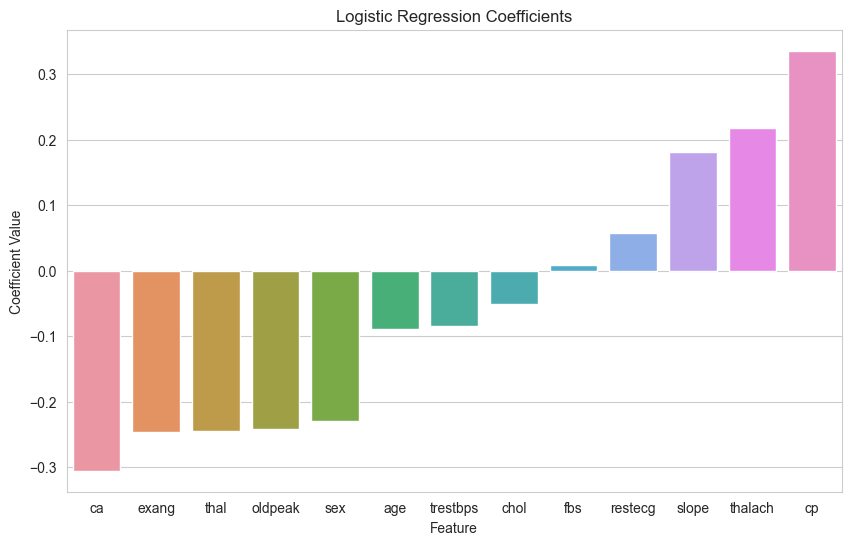

In [47]:
# CODE HERE
coefficients = best_log_model.coef_[0]  # convert to 1D array

coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

coeff_df = coeff_df.sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', data=coeff_df)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')

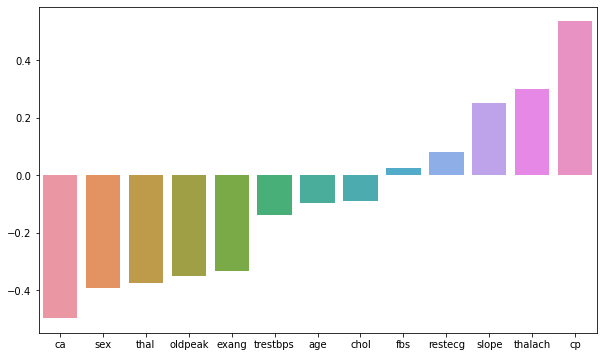

---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [48]:
# CODE HERE
y_pred = grid_model.predict(scaled_X_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test,y_pred)

0.8064516129032258

In [52]:
cm = confusion_matrix(y_test, y_pred)

# convert to DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['True Negative', 'True Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])

print(cm_df)

               Predicted Negative  Predicted Positive
True Negative                  11                   4
True Positive                   2                  14


array([[12,  3],
       [ 2, 14]], dtype=int64)

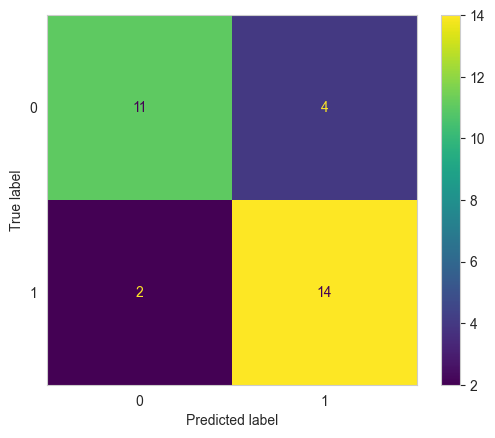

In [56]:
# CODE HERE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = best_log_model.predict(scaled_X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)

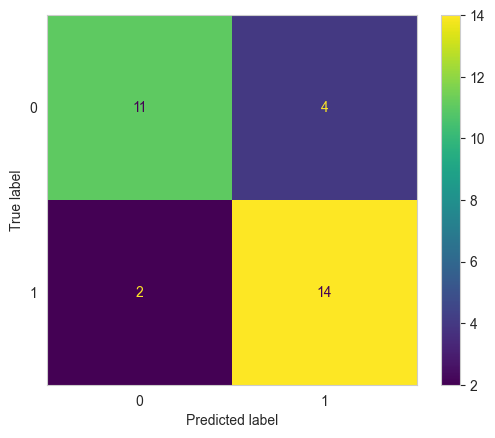

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_log_model, scaled_X_test, y_test)
plt.grid(False)

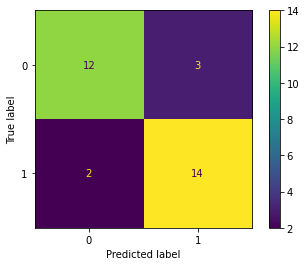

In [58]:
# CODE HERE
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.78      0.88      0.82        16

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

In [62]:
# CODE HERE
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

<Figure size 1000x600 with 0 Axes>

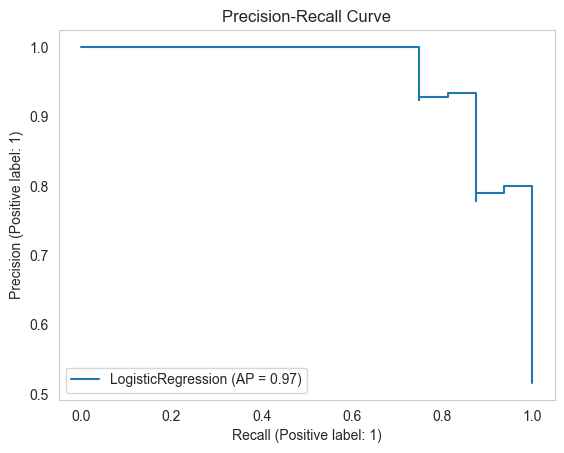

In [63]:
plt.figure(figsize=(10, 6))
PrecisionRecallDisplay.from_estimator(best_log_model, scaled_X_test, y_test)
plt.title('Precision-Recall Curve')
plt.grid(False)

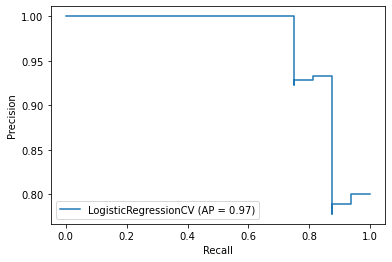

<Figure size 1000x600 with 0 Axes>

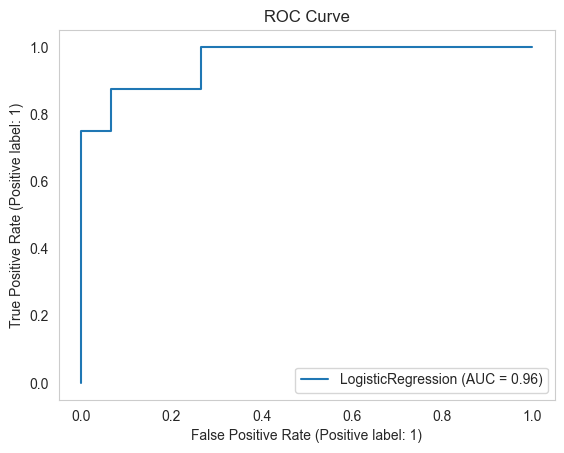

In [64]:
# CODE HERE
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(best_log_model, scaled_X_test, y_test)
plt.title('ROC Curve')
plt.grid(False)

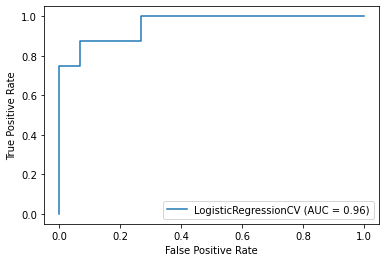

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [78]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [79]:
# CODE HERE
scaled_patient = scaler.transform(patient)

# Use the model to make a prediction
prediction = best_log_model.predict(scaled_patient)

C:\Users\fmiranda\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  """Set or check the `feature_names_in_` attribute.


In [80]:
prediction

array([0], dtype=int64)

In [71]:
# EXPECTED PREDICTION

array([0], dtype=int64)

In [81]:
probabilities = best_log_model.predict_proba(scaled_patient)

In [82]:
probabilities

array([[0.86554123, 0.13445877]])

In [72]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)

array([[9.99999862e-01, 1.38455917e-07]])

----

## Great Job!